In [2]:
import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.kernel_ridge import KernelRidge as KRR
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
import pandas as pd
import pickle
import elf
%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [36]:
baseline = 'revPBE'
# systems = ['dimers','trimers','128']
# systems = ['monomers','dimers','trimers','64']
systems = ['monomers','dimers','trimers','hexamers_embedded_ghost']
# systems = ['monomers','dimers','trimers','dimers_embedded_ghost','trimers_embedded_ghost', 'hexamers_embedded_ghost']
# systems = ['hexamers_embedded_ghost']
# systems = ['dimers_embedded']
# systems = ['64']
which = 'o'
all_targets = []
all_features = []
for system in systems:
    elfs = elf.utils.hdf5_to_elfs('../data/' + baseline + '/elfs/basis_default_elf/{}_processed.hdf5'.format(system), which)
    feat = np.concatenate([[e.value for e in e] for e in elfs], axis = 0 )
    all_features.append(feat)
feat = np.concatenate(all_features)
feat_mask = np.ptp(feat, axis = 0) > 1e-3
feat = feat[:,feat_mask]
scaler = MinMaxScaler()
scaler.fit(feat)
feat = scaler.transform(feat)

{'r_o_o': 0.9, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.35, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}
{'r_o_o': 0.9, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.35, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}
{'r_o_o': 0.9, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.35, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}
{'r_o_o': 0.9, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.35, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}


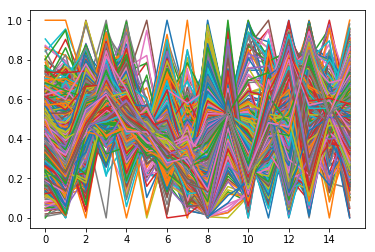

In [37]:
plot(feat.T);

In [38]:
X_train, _ = train_test_split(feat, test_size = 0.5)
X_train, X_test = train_test_split(feat, test_size = 0.5)

In [39]:
model = GPR(alpha=0.001)
model.fit(X_train, np.zeros(len(X_train)))

GaussianProcessRegressor(alpha=0.001, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [40]:
_, std_train = model.predict(X_train, return_std = True)
_, std_test = model.predict(X_test, return_std = True)

In [41]:
np.mean(std_train)

0.0054350039771135505

In [42]:
std_test /= np.mean(std_train)

(array([1.414e+03, 5.040e+02, 2.430e+02, 1.290e+02, 8.900e+01, 5.700e+01,
        3.400e+01, 2.800e+01, 1.200e+01, 1.400e+01, 9.000e+00, 1.000e+01,
        6.000e+00, 7.000e+00, 6.000e+00, 6.000e+00, 5.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00]),
 array([ 1.  ,  1.45,  1.9 ,  2.35,  2.8 ,  3.25,  3.7 ,  4.15,  4.6 ,
         5.05,  5.5 ,  5.95,  6.4 ,  6.85,  7.3 ,  7.75,  8.2 ,  8.65,
         9.1 ,  9.55, 10.  ]),
 <a list of 20 Patch objects>)

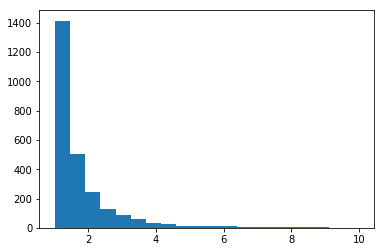

In [43]:
hist(std_test, range= (1,10), bins = 20)

In [44]:
systems = ['64']
# systems = ['128']
which = 'o'
all_features = []
for system in systems:
    elfs = elf.utils.hdf5_to_elfs('../data/' + baseline + '/elfs/basis_default_elf/{}_processed.hdf5'.format(system), which)
    ext_feat = np.concatenate([[e.value for e in e] for e in elfs], axis = 0 )
    all_features.append(ext_feat)
ext_feat = np.concatenate(all_features)
ext_feat = ext_feat[:,feat_mask]
ext_feat = scaler.transform(ext_feat)

_, std_ext = model.predict(ext_feat, return_std = True)
std_ext /= np.mean(std_train)

{'r_o_o': 0.9, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.35, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}


(array([0.01043841, 0.24425887, 0.36082116, 0.20702853, 0.10299235,
        0.04732081, 0.01913709, 0.00521921, 0.00208768, 0.00069589]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 1 Patch objects>)

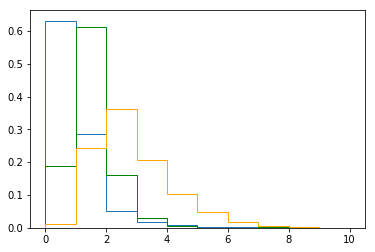

In [46]:
hist(std_test ,density=True, range= (0,10),histtype= 'step')
hist(std_ext,color = 'green', density = True,  range= (0,10), histtype= 'step')
hist(std_ext_mb,color = 'orange', density = True,  range= (0,10), histtype= 'step', label = '64 (1-3)')


NameError: name 'std_ext_dim' is not defined

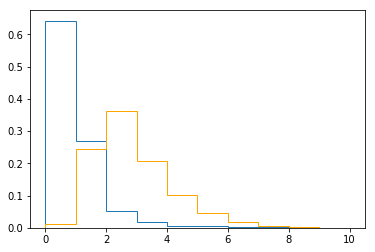

In [35]:
hist(std_test ,density=True, range= (0,10),histtype= 'step', label = 'Training geometries')
hist(std_ext_mb,color = 'orange', density = True,  range= (0,10), histtype= 'step', label = '64 (1-3)')
hist(std_ext_dim,color = 'red', density = True,  range= (0,10), histtype= 'step',label = '64 (1-3 + embedded dimers)')
hist(std_ext,color = 'green', density = True,  range= (0,10), histtype= 'step',label = '64 (1-3 + embedded dimers/trimers)')
legend()
xlabel('$\sigma_{test}/ < \sigma_{train} > $')
savefig('std_analysis_elf.pdf')
savefig('std_analysis_elf.eps')

In [13]:
std_ext_mb = np.array(std_ext)

In [89]:
std_ext_dim = np.array(std_ext)